In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  data_cleanOutliers.csv

Source: American Housing Survey by US Census Bureau

https://www.census.gov/programs-surveys/ahs/data/2017/ahs-2017-public-use-file--puf-/2017-ahs-metropolitan-puf-microdata.html


In [2]:
# File to Load 
file_to_load = "../dataset/data_cleanOutliers.csv"

# Read Purchasing File and store into Pandas data frame
housing_data = pd.read_csv(file_to_load)
housing_data.head(10)

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,outliers
0,11000001,37980,307811.0,8,2000,6.0,3,4,2,1
1,11000005,99998,229992.0,8,1970,6.0,4,5,2,1
2,11000006,99998,132220.0,5,1980,4.0,3,3,2,1
3,11000007,37980,271584.0,8,1960,7.0,4,4,2,1
4,11000013,37980,573123.0,8,1980,8.0,3,4,2,1
5,11000015,37980,153023.0,6,1950,4.0,3,2,3,1
6,11000016,37980,248031.0,6,1980,4.0,3,2,2,1
7,11000017,37980,287408.0,7,1950,6.0,3,4,2,1
8,11000023,37980,208364.0,7,1950,4.0,3,2,2,1
9,11000031,99998,39589.0,5,1940,3.0,2,3,2,1


# Cleaning and Preprocessing Data for Machine Learning

In [3]:
# Check again after we drop NULL
housing_data.isnull().sum()

CONTROL      0
OMB13CBSA    0
MARKETVAL    0
TOTROOMS     0
YRBUILT      0
UNITSIZE     0
BEDROOMS     0
BATHROOMS    0
BLD          0
outliers     0
dtype: int64

In [4]:
housing_df = housing_data.copy()

# We will study single family houses only
housing_df = housing_df.loc[housing_df['BLD'] == 2]
housing_df.head()

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,outliers
0,11000001,37980,307811.0,8,2000,6.0,3,4,2,1
1,11000005,99998,229992.0,8,1970,6.0,4,5,2,1
2,11000006,99998,132220.0,5,1980,4.0,3,3,2,1
3,11000007,37980,271584.0,8,1960,7.0,4,4,2,1
4,11000013,37980,573123.0,8,1980,8.0,3,4,2,1


In [5]:
# Let's see which city has the most rows and use that as our data
city_count_df = housing_df.groupby(['OMB13CBSA']).agg({'OMB13CBSA':'count'})
city_count_df.sort_values('OMB13CBSA')

# Use 19100 - DFW Texas

,OMB13CBSA
OMB13CBSA,
41860,210
35620,429
31080,449
33100,586
14460,595
47900,653
37980,687
42660,706
16980,797


In [6]:
# Further narrow down to one city DFW Texas 
housing_df = housing_df.loc[housing_df['OMB13CBSA'] == 19100]
housing_df.head()

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,outliers
3623,11014590,19100,190639.0,5,1940,4.0,2,1,2,1
3624,11014595,19100,374382.0,5,1970,4.0,3,3,2,1
3625,11014596,19100,178064.0,6,1980,5.0,3,3,2,1
3626,11014606,19100,378147.0,9,1970,9.0,4,5,2,1
3627,11014607,19100,58516.0,6,1950,5.0,3,3,2,1


## Build model

In [7]:
from sklearn.model_selection import train_test_split

X = housing_df[["UNITSIZE"]].values.reshape(-1, 1)
y = housing_df["MARKETVAL"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape)

(859, 1) (859, 1)


In [8]:
# Built the model
from sklearn.tree import DecisionTreeRegressor  

model = DecisionTreeRegressor(random_state = 0)  
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [9]:
# Print coefficient R2
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.4273709873108824

## Predict

In [10]:
y_predict = model.predict(X_test)
print(y_predict)

[341318.25984252 125744.95555556 304243.58762887  71072.82758621
 341318.25984252 189339.26104418 235669.72093023 341318.25984252
 189339.26104418 125744.95555556 235669.72093023  71072.82758621
 189339.26104418 235669.72093023 304243.58762887 235669.72093023
 189339.26104418 304243.58762887 189339.26104418 235669.72093023
 304243.58762887 189339.26104418 304243.58762887 189339.26104418
 189339.26104418 189339.26104418 125744.95555556 304243.58762887
 304243.58762887 341318.25984252 235669.72093023 189339.26104418
 189339.26104418 235669.72093023 304243.58762887 341318.25984252
 304243.58762887 235669.72093023 235669.72093023 189339.26104418
 189339.26104418 341318.25984252 235669.72093023 341318.25984252
 235669.72093023 341318.25984252 189339.26104418 125744.95555556
 423635.93478261 235669.72093023 125744.95555556 304243.58762887
 189339.26104418 341318.25984252 235669.72093023 304243.58762887
 189339.26104418 189339.26104418 341318.25984252 189339.26104418
 189339.26104418 189339.2

## Visualize the Prediction

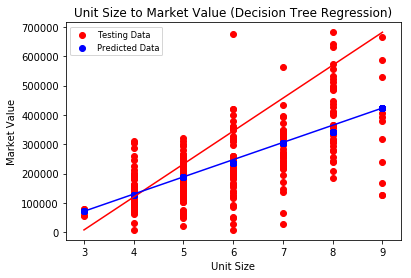

In [12]:
# Trend Line
X_test_min = np.array([[X_test.min()]])
X_test_max = np.array([[X_test.max()]])
y_test_min = np.array([[y_test.min()]])
y_test_max = np.array([[y_test.max()]])

y_predict_min = np.array([[y_predict.min()]])
y_predict_max = np.array([[y_predict.max()]])

# scatter plot for test data 
plt.scatter(X_test, y_test, color = 'red', label='Testing Data') 
plt.plot([X_test_min[0], X_test_max[0]], [y_test_min[0], y_test_max[0]], c='red')

# plot predicted data 
plt.scatter(X_test, y_predict, color = 'blue', label='Predicted Data')  
plt.plot([X_test_min[0], X_test_max[0]], [y_predict_min[0], y_predict_max[0]], c='blue')

# specify title 
plt.title('Unit Size to Market Value (Decision Tree Regression)')  
  
# specify X axis label 
plt.xlabel('Unit Size') 
  
# specify Y axis label 
plt.ylabel('Market Value') 

plt.ticklabel_format(useOffset=False, style='plain')

plt.legend(loc='upper left', fontsize='small')

# Save the figure to output
plt.savefig("../output/Regression_DecisionTree_City_Clean.png")

In [45]:
plt.show()

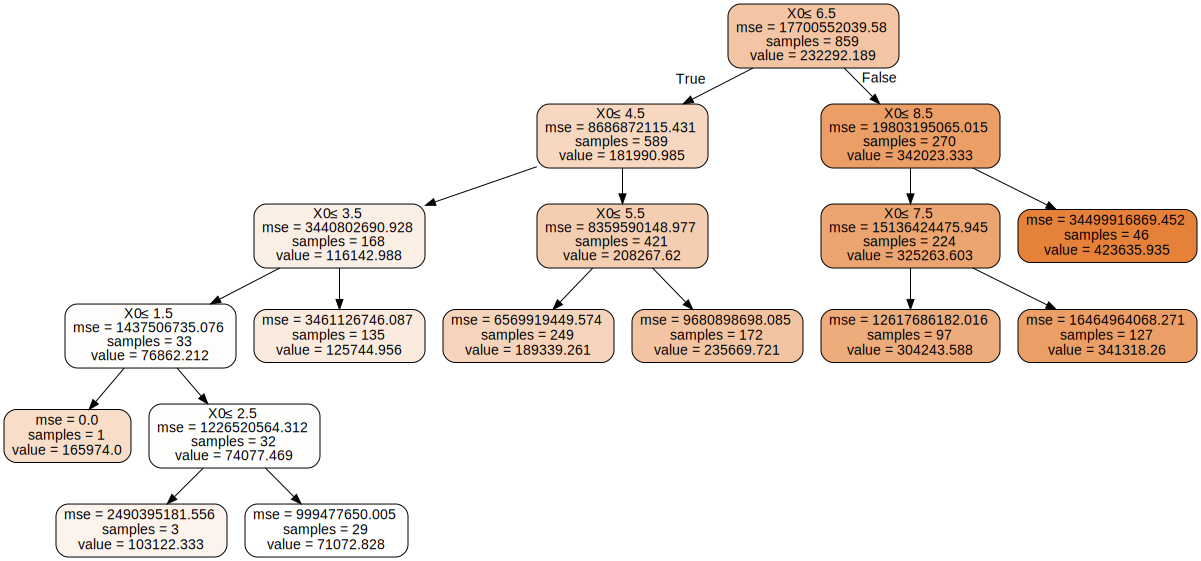

In [16]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
from sklearn import tree

# export the decision tree for visualization
import graphviz 
dot_data = tree.export_graphviz(
    model, out_file=None, 
    #feature_names='House Market Value - DFW Texas clean data',  
    #class_names=iris.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('../output/DecisionTree_City_Clean.png')

graph = graphviz.Source(dot_data)  
graph 